## **Trabajo Práctico Individual n° 2: Aprendizaje Supervisado**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Jose Ignacio
- Apellido: Jonte
- Legajo: 1634148

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el aprendizaje automático supervisado.

Utilizaremos un dataset de airbnb donde buscaremos predecir el precio de las noches de cada hogar en funcion de algunas variables.

#### Variables:
- Unnamed: 0: Variable de contador de registros (no será utilizada en nuetro análisis)
- neighbourhood: Barrio donde se encuentra ubicado la casa.
- room_type: Tipo de hogar en alquiler.
- price: Precio por noche.
- minimum_nights: Cantidad minimas de noches que pueden alquilar el hogar.
- number_of_reviews: Cantidad de reviews
- reviews_per_month: Tasa de reviews que tienen por mes
- calculated_host_listings_count: Cantidad de hogares ofrecidos por el host.
- availability_365: Cantidad de dias que se encuentra en alquiler el hogar

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 13 de Octubre 2022 a las 23h59

In [1]:
## Importo librerías de maniupulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset bajo en nombre "london"
- corroborar que lo hayamos cargado correctamente.

In [3]:
bd=pd.read_csv('TP2_airbnb_london.csv')
bd.head()

,Unnamed: 0,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,Haringey,Private room,35,1,131,1.71,4,262
1,1,Ealing,Private room,70,2,2,0.07,6,62
2,2,Islington,Private room,45,1,14,0.14,2,364
3,5,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295
4,6,Barnet,Private room,29,5,114,1.13,3,285


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset y eliminar la variable "Unnamed:0" del dataset.
Volver a guardar el dataset sin esta variable bajo el nombre "london" 

In [4]:
bd.drop('Unnamed: 0',axis=1, inplace=True) #Borro la variable Unnamed:0
np.shape(bd)

(51827, 8)

##### **Objetivo 3**
Corroborar que el dataset no cuenta con valores nulos, si los hubiera llenarlos todos con 0.

In [5]:
#Forma 1, ademas tengo el tipo de dato por columna adelantandome al punto 4
bd.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51827 entries, 0 to 51826
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   51827 non-null  object 
 1   room_type                       51827 non-null  object 
 2   price                           51827 non-null  int64  
 3   minimum_nights                  51827 non-null  int64  
 4   number_of_reviews               51827 non-null  int64  
 5   reviews_per_month               51827 non-null  float64
 6   calculated_host_listings_count  51827 non-null  int64  
 7   availability_365                51827 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.2+ MB


In [6]:
#Forma 2, sin el tipo de dato. Ambas corroboran que no hay valores nulos en el DataFrame. 
bd.isnull().sum()

neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

##### **Objetivo 4**
Mostrar el tipo de dato para las variables "neighbourhood" y "room_type".

In [63]:
type(bd.neighbourhood) #Tipo de dato
type(bd.room_type)
#Ambas son iguales

pandas.core.series.Series

##### **Objetivo 5**
Generar las variables dummies para estas dos variables categóricas y unirlas al dataset london.


In [8]:
## Genero las dummies para la variable neighbourhood, dentro de la variable neigh_dummies.
neigh_dummies = pd.get_dummies(bd['neighbourhood']) #De esa manera me guardo unicamente las dummies creadas

Imprimir las dimensiones y primeras lineas de estas dummies

In [9]:
neigh_dummies.head()

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
## Genero las dummies para la variable room_type, dentro de la variable room_dummies.
room_dummies =pd.get_dummies(bd['room_type'])

Imprimir las dimensiones y primeras lineas de estas dummies

In [11]:
room_dummies.head()

,Entire home/apt,Private room,Shared room
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


Joinear las variables dummies al dataset



In [12]:
dummies = neigh_dummies.join(room_dummies) #Junto las variables dummies
bd2=bd.join(dummies) #Junto las variables dummies con el dataset
bd2

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Barking and Dagenham,Barnet,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Private room,Shared room
0,Haringey,Private room,35,1,131,1.71,4,262,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Ealing,Private room,70,2,2,0.07,6,62,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Islington,Private room,45,1,14,0.14,2,364,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295,0,0,...,0,0,0,1,0,0,0,1,0,0
4,Barnet,Private room,29,5,114,1.13,3,285,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51822,Brent,Entire home/apt,60,5,1,1.00,1,7,0,0,...,0,0,0,0,0,0,0,1,0,0
51823,Lewisham,Entire home/apt,30,2,1,1.00,1,26,0,0,...,0,0,0,0,0,0,0,1,0,0
51824,Westminster,Entire home/apt,280,3,1,1.00,14,352,0,0,...,0,0,0,0,0,0,1,1,0,0
51825,Tower Hamlets,Private room,35,2,1,1.00,1,13,0,0,...,0,0,0,1,0,0,0,0,1,0


##### Me quedo con una fraccion del DF por tiempos de computo
Borro 45000 filas de forma random

In [13]:
from numpy.random import default_rng

arr_indices_top_drop = default_rng().choice(bd2.index, size=42000, replace=False)
bd2=bd2.drop(index=arr_indices_top_drop)
bd2

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Barking and Dagenham,Barnet,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Private room,Shared room
2,Islington,Private room,45,1,14,0.14,2,364,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295,0,0,...,0,0,0,1,0,0,0,1,0,0
6,Islington,Entire home/apt,150,2,67,0.71,7,353,0,0,...,0,0,0,0,0,0,0,1,0,0
8,Barnet,Entire home/apt,185,7,1,0.02,2,0,0,1,...,0,0,0,0,0,0,0,1,0,0
12,Camden,Private room,45,1,163,1.66,2,348,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51803,Haringey,Entire home/apt,77,2,1,1.00,1,6,0,0,...,0,0,0,0,0,0,0,1,0,0
51819,Westminster,Entire home/apt,60,1,1,1.00,1,82,0,0,...,0,0,0,0,0,0,1,1,0,0
51822,Brent,Entire home/apt,60,5,1,1.00,1,7,0,0,...,0,0,0,0,0,0,0,1,0,0
51823,Lewisham,Entire home/apt,30,2,1,1.00,1,26,0,0,...,0,0,0,0,0,0,0,1,0,0


##### Dividiremos nuestro dataset en la variable dependiente "y" (label o etiqueta) y las variables independientes "x"


In [14]:
y = np.array(bd2[["price"]]) #Guardo en Y la variable dependiente
x = bd2.drop(['price', 'neighbourhood','room_type'], axis=1) #Saco las columnas de precio (la tengo ahora en x), barrio y roomtype
#ya que las tengo como dummies
x.columns

Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster',
       'Entire home/apt', 'Private room', 'Shared room'],
      dtype='object')

In [15]:
#Para separar mas prolijamente las categoricas
var_cat=['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster',
       'Entire home/apt', 'Private room', 'Shared room']

##### **Objetivo 7**

Dividir el dataset entre Train y Test, tomar un test_size del 30%.

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=2)

In [17]:
xtrain

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Private room,Shared room
26753,2,23,1.40,159,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
44502,10,1,0.34,1,172,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46966,1,14,5.68,2,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
43079,2,11,2.32,2,314,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34213,3,2,0.95,1,263,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,3,52,1.13,1,76,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12887,2,76,2.48,1,215,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34935,3,12,1.10,1034,121,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13225,2,14,0.47,2,254,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Separo las columnas de las Dummies en xtrain y xtest.
De esta manera no estandarizo las dummies

In [18]:
#Guardo variables numericas a las que luego les hago el scaler
xtrain_num = xtrain[['minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']]
xtest_num=xtest[['minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']]

In [19]:
xtrain_num.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
26753,2,23,1.40,159,0
44502,10,1,0.34,1,172
46966,1,14,5.68,2,18
43079,2,11,2.32,2,314
34213,3,2,0.95,1,263


<AxesSubplot:>

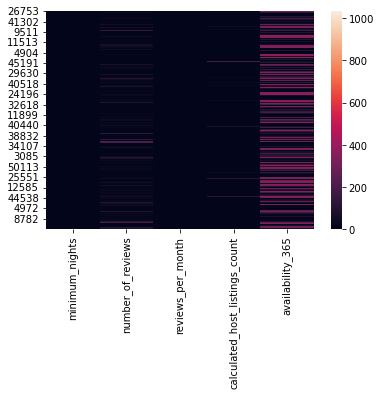

In [20]:
sns.heatmap(xtrain_num)

In [21]:
#Guardo los valores dummies en otro df
xtrain_dum=xtrain[var_cat]
xtest_dum=xtest[var_cat]

##### **Objetivo 8**
Con el StandardScaler generado en la linea siguiente, realizar el transform para el xtrain y xtest guardandolos en nuevas variables llamadas "xtrain_scal" y "xtest_scal".
Debo antes separar las Dummies


In [22]:
scaler = preprocessing.StandardScaler().fit(xtrain_num)

In [23]:
xtrain_scal = scaler.transform(xtrain_num)

In [24]:
xtest_scal = scaler.transform(xtest_num)

Text(0.5, 1.0, 'Standarized train data')

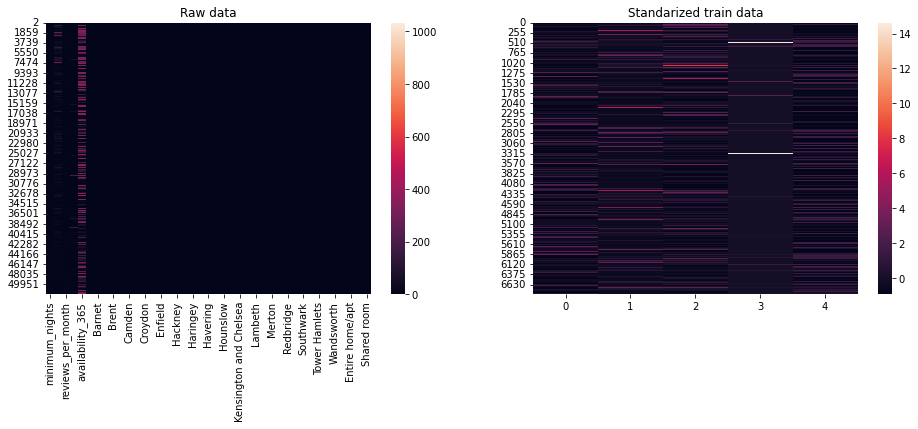

In [66]:
#Comparo antes y despues de estandarizar
fig, axs = plt.subplots(1, 2, figsize=(16,5))
sns.heatmap(x, ax = axs[0])
sns.heatmap(xtrain_scal, ax = axs[1])
axs[0].set_title('Raw data')
axs[1].set_title('Standarized train data')

In [26]:
#Joineo ahora las variables numericas estandarizadas con las dummies
xtrain_scal_d=np.concatenate((xtrain_scal,xtrain_dum),axis=1)
cheq=pd.DataFrame(xtrain_scal_d) #Convierto a DF para visualizar que el array este correctamente
cheq.head(2)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.229987,0.086307,0.070498,2.109873,-0.943186,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.797755,-0.555979,-0.660582,-0.151436,0.372044,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
#Joineo ahora las variables numericas estandarizadas con las dummies
xtest_scal_d=np.concatenate((xtest_scal,xtest_dum),axis=1)

##### **Objetivo 9**
Crear un modelo lineal y entrenarlo para nuestro dataset.

Obtener las predicciones y el "mean_squared_error" para el test set.

In [28]:
regli=LinearRegression() #Defino el modelo lineal
regli.fit(xtrain_scal_d, ytrain) #Fitteo a los datos de train
ypred=regli.predict(xtest_scal_d)

In [29]:
(mean_squared_error(ytest, ypred)) #Obtengo el MSE2

1521.4264709741717

In [30]:
np.shape(regli.coef_) #41 coeficientes, uno para cada feature.

(1, 41)

In [68]:
max_w=regli.coef_.max()
min_w =regli.coef_.min()
max_w #Veo el valor maximo de w

35760369352387.7

##### **Objetivo 10**
Crear un SVM Regressor y un GridSearch para realizar la búsqueda de hiperparámetros.

Asignar dos posibles valores para el parámetro "kernel", y tres posibles valores para "C" y "gamma".

Setear al parámetro "refit" en True y hacer 5 CrossValidation.

In [32]:
svr=SVR() #Modelo
parameters={'kernel':('linear', 'rbf'), #Parametros
              'C':[1,10, 100],
              'gamma':[1, 10,100]}

In [33]:
gsearch=GridSearchCV(svr,param_grid=parameters,cv=5,refit=True,verbose=3) #Guardo el grid search en "gsearch"
gsearch.fit(xtrain_scal_d,ytrain.ravel()) #Fitteo

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.452 total time=   1.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.487 total time=   1.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.477 total time=   0.9s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.515 total time=   1.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.494 total time=   1.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.211 total time=   1.7s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.243 total time=   1.7s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.198 total time=   1.7s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.266 total time=   1.7s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.230 total time=   1.7s
[CV 1/5] END ......C=1, gamma=10, kernel=linear;, score=0.452 total time=   1.0s
[CV 2/5] END ......C=1, gamma=10, kernel=linear;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 10, 100],
                         'kernel': ('linear', 'rbf')},
             verbose=3)

In [47]:
resultados=pd.DataFrame.from_dict(gsearch.cv_results_).sort_values(by='rank_test_score')
resultados.head(7)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,3.364792,0.143519,0.153519,0.000858,100,10,linear,"{'C': 100, 'gamma': 10, 'kernel': 'linear'}",0.461285,0.496017,0.489673,0.521408,0.501444,0.493965,0.019492,1
12,3.373817,0.143911,0.155461,0.002353,100,1,linear,"{'C': 100, 'gamma': 1, 'kernel': 'linear'}",0.461285,0.496017,0.489673,0.521408,0.501444,0.493965,0.019492,1
16,3.310708,0.122347,0.159218,0.007037,100,100,linear,"{'C': 100, 'gamma': 100, 'kernel': 'linear'}",0.461285,0.496017,0.489673,0.521408,0.501444,0.493965,0.019492,1
8,1.223843,0.039553,0.155305,0.002402,10,10,linear,"{'C': 10, 'gamma': 10, 'kernel': 'linear'}",0.460517,0.494791,0.488844,0.520653,0.500982,0.493157,0.019514,4
10,1.194139,0.038355,0.151482,0.001683,10,100,linear,"{'C': 10, 'gamma': 100, 'kernel': 'linear'}",0.460517,0.494791,0.488844,0.520653,0.500982,0.493157,0.019514,4
6,1.321743,0.099726,0.160060,0.002726,10,1,linear,"{'C': 10, 'gamma': 1, 'kernel': 'linear'}",0.460517,0.494791,0.488844,0.520653,0.500982,0.493157,0.019514,4
0,0.914008,0.013788,0.147224,0.006421,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.452383,0.486547,0.477232,0.514969,0.494213,0.485069,0.020541,7


##### **Objetivo 11**

Mostrar cuales fueron los mejores hiperparámetros y para estos obtener el mean_squared_error en el test set.

In [49]:
print("The best parameters are %s with a score of %0.4f" % (gsearch.best_params_, gsearch.best_score_))

The best parameters are {'C': 100, 'gamma': 1, 'kernel': 'linear'} with a score of 0.4940


In [52]:
y_pred2 = gsearch.predict(xtest_scal_d)
print(y_pred2)

[ 36.17986373  37.27566816  44.8092687  ...  96.79894142 100.6493821
  40.28146205]


In [56]:
# Model prediciton
MSE2=(mean_squared_error(ytest, y_pred2))
MSE2

1611.2856880253255

##### **Objetivo 12**
Repetir el objetivo 10 pero ahora seteando nuevos valores para los hiperparámetros mencionados con el objetivo de mejorar las predicciones.

Cuales son los mejores hiperparámetros ahora?
Obtenemos una mejora en las predicciones?
Mostrar los resultados.

In [59]:
parameters2={'kernel':('linear', 'sigmoid'),
              'C':[50,150, 100],
              'gamma':[1, 0.5,]}
gsearch2=GridSearchCV(svr,param_grid=parameters2,cv=5,refit=True,verbose=3)
gsearch2.fit(xtrain_scal_d,ytrain.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......C=50, gamma=1, kernel=linear;, score=0.461 total time=   2.0s
[CV 2/5] END ......C=50, gamma=1, kernel=linear;, score=0.496 total time=   2.1s
[CV 3/5] END ......C=50, gamma=1, kernel=linear;, score=0.490 total time=   2.2s
[CV 4/5] END ......C=50, gamma=1, kernel=linear;, score=0.521 total time=   2.1s
[CV 5/5] END ......C=50, gamma=1, kernel=linear;, score=0.501 total time=   2.1s
[CV 1/5] END C=50, gamma=1, kernel=sigmoid;, score=-124342.039 total time=   2.0s
[CV 2/5] END C=50, gamma=1, kernel=sigmoid;, score=-146462.012 total time=   2.0s
[CV 3/5] END C=50, gamma=1, kernel=sigmoid;, score=-134274.967 total time=   2.0s
[CV 4/5] END C=50, gamma=1, kernel=sigmoid;, score=-136011.252 total time=   2.0s
[CV 5/5] END C=50, gamma=1, kernel=sigmoid;, score=-134140.737 total time=   2.0s
[CV 1/5] END ....C=50, gamma=0.5, kernel=linear;, score=0.461 total time=   2.0s
[CV 2/5] END ....C=50, gamma=0.5, kernel=li

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [50, 150, 100], 'gamma': [1, 0.5],
                         'kernel': ('linear', 'sigmoid')},
             verbose=3)

In [60]:
print("The best parameters are %s with a score of %0.4f" % (gsearch2.best_params_, gsearch2.best_score_))

The best parameters are {'C': 50, 'gamma': 1, 'kernel': 'linear'} with a score of 0.4940


In [61]:
y_pred3 = gsearch2.predict(xtest_scal_d)
print(y_pred3)

[ 36.20160346  37.2719734   44.76560069 ...  96.87287085 100.633662
  40.2947403 ]


In [62]:
# Model prediciton
MSE2=(mean_squared_error(ytest, y_pred3))
MSE2

1611.79454159912